# Exercise 5.1


_Follow the steps in the script to fit a Sigmoid function to the following data:_

| Energy ($E_{i}$) | Trials($N_{i}$) | Successes ($r_{i}$) |
|:------------------:|:-----------------:|:---------------------:|
| 0.5              | 100             | 0                   |
| 1.0              | 100             | 4                   |
| 1.5              | 100             | 22                  |
| 2.0              | 100             | 55                  |
| 2.5              | 100             | 80                  |
| 3.0              | 100             | 97                  |
| 3.5              | 100             | 99                  |
| 4.0              | 100             | 99                  |

_a) Find the posterior probability distribution for the parameters
($A$,$E_{0}$)_

_b) Define a suitable test statistic and find the frequentist 68 % Confidence
Level region for ($A$,$E_{0}$)_


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import progressbar
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.stats import binom 
from scipy.stats import norm
widgets = [
        'Test: ', progressbar.Percentage(),
        ' ', progressbar.Bar(marker=progressbar.RotatingMarker()),
        ' ', progressbar.ETA()]

In [4]:
E=np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
r=np.array([0,4,22,55,80,97,99,99])
N=100
E_cont=np.linspace(0,4,100)

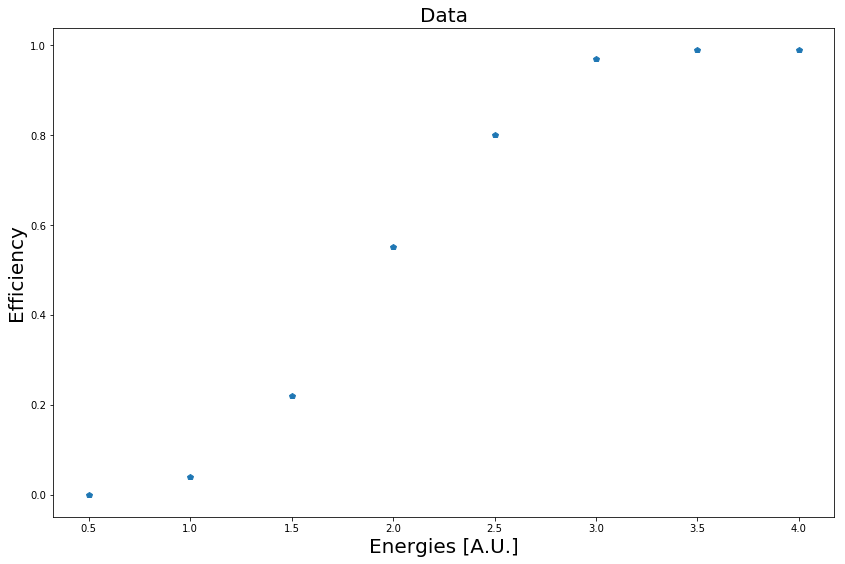

In [5]:
plt.figure(figsize=(14,9))
plt.ylabel('Efficiency',fontsize=20)
plt.xlabel('Energies [A.U.]',fontsize=20)
plt.title('Data',fontsize=20)
plt.plot(E,1.0*r/N,'p')
plt.show()

Our model is a sigmoid funktion:

$$\epsilon(E) = \frac{1}{1+\exp[-A(E-E_0)]}$$

# Posterior:

\begin{align}
    P(\lambda|\{r_i\},\{N_i\}) &= \dfrac{P(\{r_i\}|\{N_i\}, \lambda)\cdot P_0(\lambda)}{\int P(\{r_i\}|\{N_i\}, \lambda)\cdot P_0(\lambda)\textrm{d}\lambda} \\
    &= \dfrac{P(\{r_i\}|\{N_i\}, \lambda)\cdot P_0(A)\cdot P_0(E_0)}{\int P(\{r_i\}|\{N_i\}, \lambda)\cdot P_0(A)\cdot P_0(E_0)\textrm{d}\lambda}
\end{align}

\begin{align}
    P(\{r_i\}|\{N_i\}, \lambda) = \prod\limits_{i=1}^{k}\binom{N_i}{r_i}\epsilon(\lambda)^{r_i}(1-\epsilon(\lambda))^{N_i-r_i}
\end{align}

In [6]:
def model(E,A,E0):
    return 1./(1+np.exp(-A*(E-E0)))
#binom.pmf(2,3,0.5) # r,N,p


In [7]:
def prior_E0(E0):    
    return norm.pdf(E0,2,0.3)

def prior_A(A):
    return norm(loc=3., scale=0.5).pdf(A)

In [8]:
print prior_E0(1.)

0.00514092998764


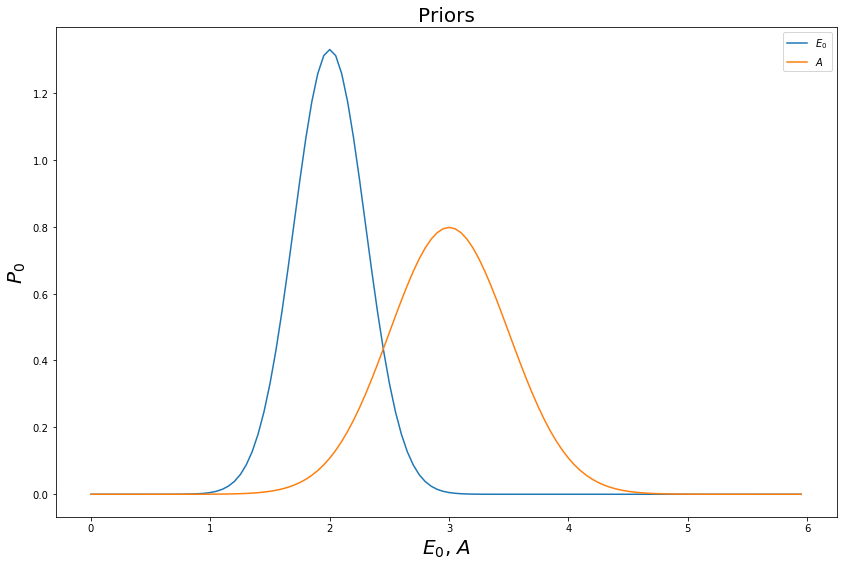

In [9]:
plt.figure(figsize=(14,9))
x = np.arange(0,6,0.05)
P0_E0 = prior_E0(x)
P0_A = prior_A(x)
plt.plot(x, P0_E0, label="$E_0$" )
plt.plot(x, P0_A, label="$A$")
plt.legend()

plt.xlabel("$E_0$, $A$",fontsize=20)
plt.ylabel("$P_0$",fontsize=20)
plt.title("Priors",fontsize=20)

plt.show()

In [10]:
def LH(E,r,N,A,E0):
    result=1.0
    for i in range(len(E)):
        result=result*binom.pmf(r[i],N,model(E[i],A,E0))
    return result

In [11]:
def PDF(E,r,N,A,E0):
    return LH(E,r,N,A,E0) * prior_E0(E0) * prior_A(A)

In [12]:
a_start=2.
a_stop=4.
E0_start=1.
E0_stop=3.
steps=100

stepsize_a = (a_stop - a_start)/steps
stepsize_E0 = (E0_stop - E0_start)/steps

A_range = np.linspace(a_start,a_stop,steps)
E0_range = np.linspace(E0_start,E0_stop,steps)

PDF_values = np.zeros((len(A_range),len(E0_range)))
mode=0.0
mode_a = mode_b = 0.0
normalize = 0.0
count=0
a_count=0
b_count=0
maxvalue = len(A_range)*len(E0_range)
bar = progressbar.ProgressBar(widgets=widgets, maxval=maxvalue).start()

for a in A_range:
    a_count+=1
    b_count=0
    for b in E0_range:
            b_count+=1
            count+=1
            current_pdf_value = PDF(E,r,N,a,b)
            if current_pdf_value>=mode:
                mode= current_pdf_value
                mode_a=a
                mode_b=b
                
            normalize+=current_pdf_value * stepsize_a * stepsize_E0
            PDF_values[a_count-1][b_count-1]=current_pdf_value
            bar.update(count)
            
bar.finish()       
print normalize

print mode_a
print mode_b

1.25469449737e-08
3.0101010101
1.9696969697


Test: 100% |||||||||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:00:12


In [13]:
#Here we Normalize, i.e. add the denominator to obtain the actual and complete PDF
PDF_values=PDF_values/normalize
mode=mode/normalize
print mode*stepsize_E0*stepsize_a

0.00819906468629


In [14]:
#Normalization
P=0.0
for ia in range(len(A_range)):
    for ib in range(len(E0_range)):
        P+= PDF_values[ia][ib]*stepsize_E0*stepsize_a
print P

1.0


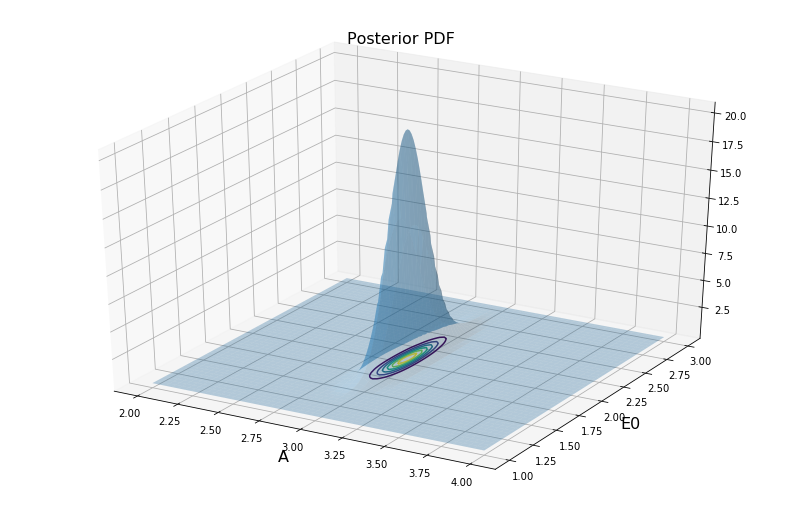

In [15]:
fig = plt.figure(figsize = (14,9))
ax= fig.gca(projection='3d')
plt.title('Posterior PDF',fontsize=16)
plt.xlabel('A',fontsize=16)
plt.ylabel('E0',fontsize=16)
X,Y = np.meshgrid(A_range, E0_range)
ax.plot_surface(X,Y,PDF_values,alpha=0.3)
ax.contour(A_range, E0_range,PDF_values,zdir='z',offset=0)
plt.show()

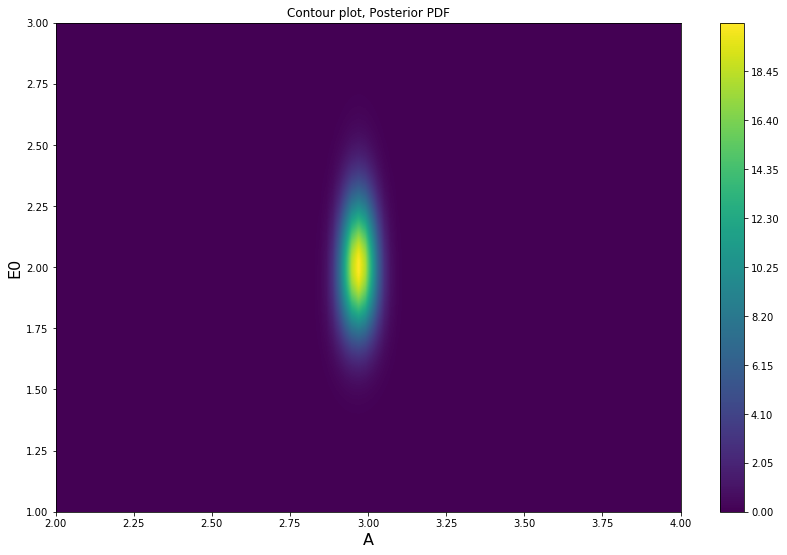

In [16]:
plt.figure(figsize=(14,9))
plt.title('Contour plot, Posterior PDF')
plt.xlabel('A',fontsize=16)
plt.ylabel('E0',fontsize=16)
plt.contourf(A_range, E0_range,PDF_values,np.arange(PDF_values.min(),PDF_values.max(),0.01))
plt.colorbar()
plt.show()

In [17]:
a_start=2.2
a_stop=3.8
E0_start=1.2
E0_stop=2.8

steps=200

stepsize_a = (a_stop - a_start)/steps
stepsize_E0 = (E0_stop - E0_start)/steps

A_range = np.linspace(a_start,a_stop,steps)
E0_range = np.linspace(E0_start,E0_stop,steps)

PDF_values = np.zeros((len(A_range),len(E0_range)))
PDF_triple = []
triple=(0.,0.,0.)
mode=0.0
mode_a = mode_b = 0.0
normalize = 0.0
count=0
a_count=0
b_count=0
maxvalue = len(A_range)*len(E0_range)
bar = progressbar.ProgressBar(widgets=widgets, maxval=maxvalue).start()

for a in A_range:
    a_count+=1
    b_count=0
    for b in E0_range:
            b_count+=1
            count+=1
            current_pdf_value = PDF(E,r,N,a,b)
            if current_pdf_value>=mode:
                mode= current_pdf_value
                mode_a=a
                mode_b=b
                
            normalize+=current_pdf_value * stepsize_a * stepsize_E0
            PDF_values[a_count-1][b_count-1]=current_pdf_value
            triple=(current_pdf_value,a,b)
            PDF_triple.append(triple)
            bar.update(count)
            
bar.finish()       
print normalize
PDF_values=PDF_values/normalize
mode=mode/normalize
print mode*stepsize_E0*stepsize_a
print mode_a
print mode_b
print stepsize_E0*stepsize_a

1.2672848994e-08
0.00129698255911
3.0040201005
1.97185929648
6.4e-05


Test: 100% |||||||||||||||||||||||||||||||||||||||||||||||||||||| Time: 0:00:48


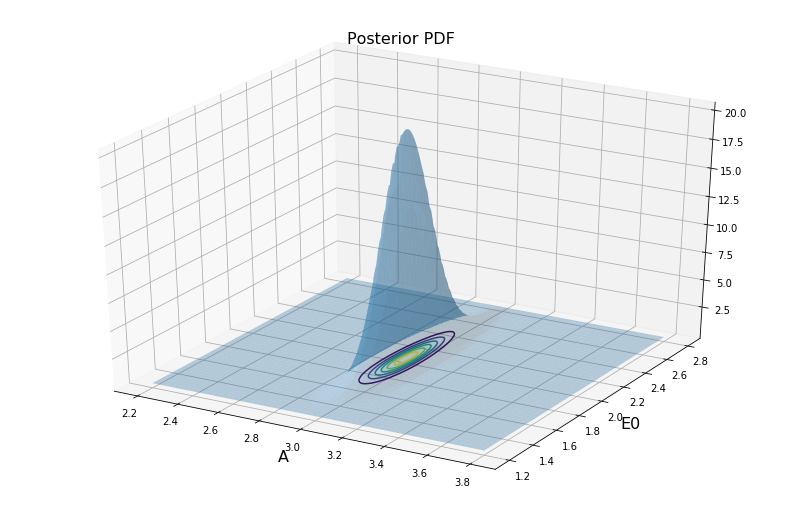

In [18]:
fig = plt.figure(figsize = (14,9))
ax= fig.gca(projection='3d')
X,Y = np.meshgrid(A_range, E0_range)
ax.plot_surface(X,Y,PDF_values,alpha=0.3)
ax.contour(A_range, E0_range,PDF_values,zdir='z',offset=0)
plt.title('Posterior PDF',fontsize=16)
plt.xlabel('A',fontsize=16)
plt.ylabel('E0',fontsize=16)
plt.show()

## Now, one can looik for the 68%, 90% and 95% regions

In [19]:
PDF_triple = list(sorted(PDF_triple, key=lambda x: x[0], reverse=True))
print PDF_triple[1]
print PDF_triple[2]
print PDF_triple[3]

(2.566730626625664e-07, 2.9959798994974873, 1.971859296482412)
(2.5653113008354059e-07, 3.012060301507538, 1.971859296482412)
(2.5608919961714039e-07, 2.9879396984924624, 1.971859296482412)


In [20]:
interval_68=[]
interval_90=[]
interval_95=[]
def find_smallest_interval(sorted_array,min_percent):
    acc_sum=0.0
    icnt=0
    interval_SI=[]
    interval_A=[]
    interval_E0=[]
    while acc_sum<min_percent:
        curr_prob=sorted_array[icnt][0]*stepsize_E0*stepsize_a/normalize
        acc_sum+= curr_prob
        interval_SI.append(curr_prob)
        interval_A.append(sorted_array[icnt][1])
        interval_E0.append(sorted_array[icnt][2])
        icnt+=1
    return interval_SI,interval_A,interval_E0
interval_68_SI, interval_68_A, interval_68_E0 = find_smallest_interval(PDF_triple,0.68)
interval_90_SI, interval_90_A, interval_90_E0 = find_smallest_interval(PDF_triple,0.90)
interval_95_SI, interval_95_A, interval_95_E0 = find_smallest_interval(PDF_triple,0.95)

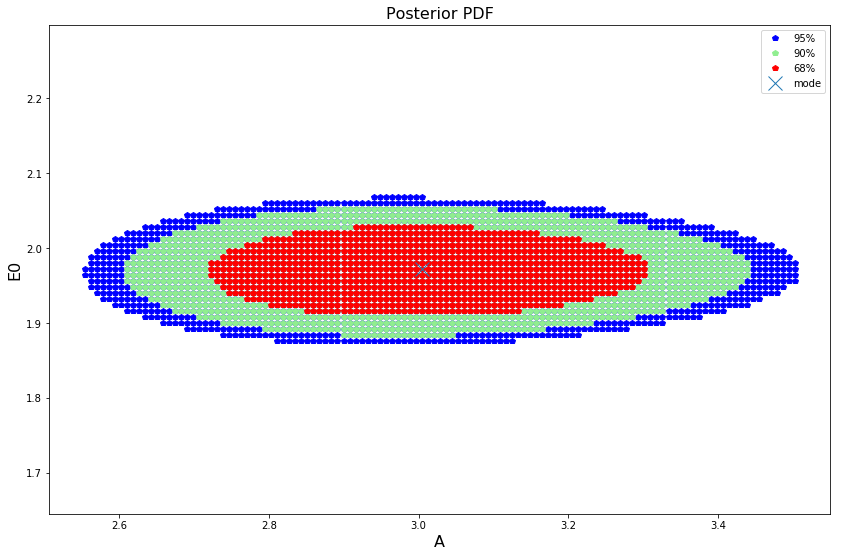

In [21]:
#print interval_68_SI
#print interval_68_A
plt.figure(figsize=(14,9))
plt.plot(interval_95_A,interval_95_E0,'p',c='blue',label='95%')
plt.plot(interval_90_A,interval_90_E0,'p',c='lightgreen',label='90%')
plt.plot(interval_68_A,interval_68_E0,'p',c='red',label='68%')
plt.title('Posterior PDF',fontsize=16)
plt.xlabel('A',fontsize=16)
plt.ylabel('E0',fontsize=16)
plt.plot(mode_a,mode_b,'x',markersize=14,label='mode')
plt.legend()
plt.axis('equal')
plt.show()

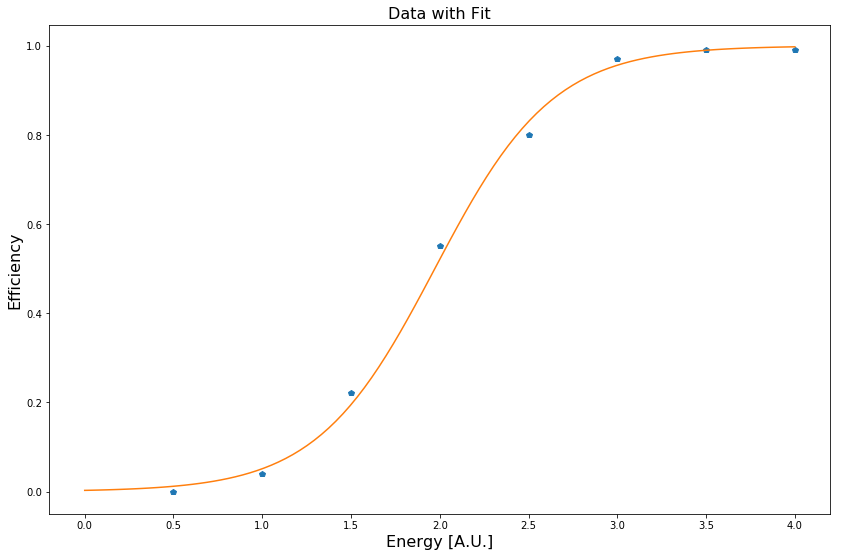

In [22]:
plt.figure(figsize=(14,9))
plt.plot(E,1.0*r/N,'p')

plt.plot(E_cont,model(E_cont,mode_a,mode_b))
plt.title('Data with Fit',fontsize = 16)
plt.ylabel('Efficiency',fontsize = 16)
plt.xlabel('Energy [A.U.]',fontsize = 16)
plt.show()

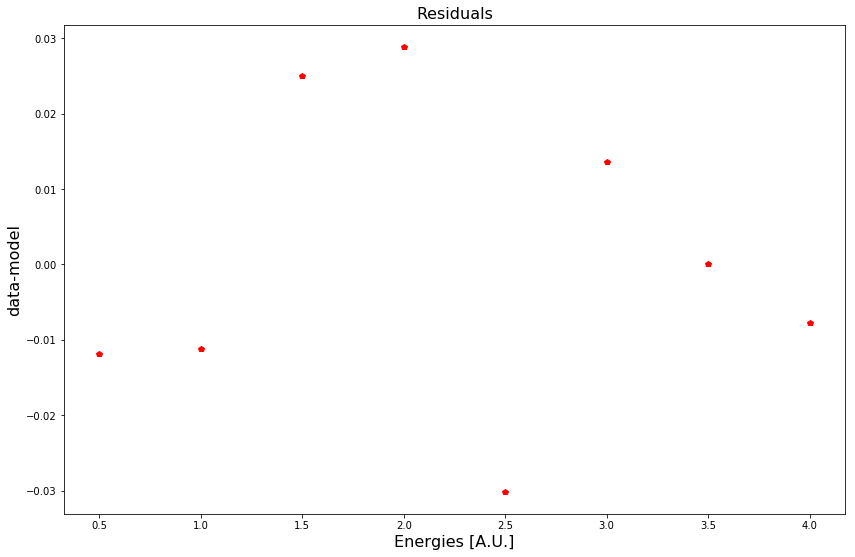

In [23]:
plt.figure(figsize=(14,9))
plt.title('Residuals',fontsize = 16)
plt.ylabel('data-model',fontsize = 16)
plt.xlabel('Energies [A.U.]',fontsize = 16)
plt.plot(E,1.0*r/N-model(E,mode_a,mode_b),'p',color='Red')
plt.show()

# (b)

We first need to define a test statistic.

We use the product of all the probabilities of our datapoints:

$$ \xi ( \{r_i\} |\lambda) = \prod_i \text{binom}\left( r_i, N_i, p_i(\lambda) \right) $$

In [24]:
def test_statistic(r, N, p):
    #assert len(r) == len(N), "r and N arrays have to be of same length"
    
    result = 1.0
    for i in range(0,len(r)):
        result *= binom.pmf(r[i], N, p[i])
    return result

In [25]:
def test_statistic_log(r, N, p):
    #assert len(r) == len(N), "r and N arrays have to be of same length"
    
    result = 0.0
    for i in range(0,len(r)):
        result += np.log(binom.pmf(r[i], N, p[i]))
    return result

In [26]:
A_range = np.linspace(2.2,3.8,100)
E0_range = np.linspace(1.2,2.8,100)
N=100
ensemble_size=1000

As=[[],[],[]]
E0s=[[],[],[]]
maxvalue = len(A_range)*len(E0_range)
bar = progressbar.ProgressBar(widgets=widgets, maxval=maxvalue).start()
count=0
mode=0.0
for a in A_range:
    model_values=np.zeros(len(E))
    for e0 in E0_range:
        TS_list=[]
        for i in range(len(E)):
            model_values[i]= model(E[i],a,e0)
        for j in range(ensemble_size):
            dataset_sample = np.zeros(len(E)) 
            for k in range(len(E)):
                dataset_sample[k]=np.random.binomial(N,model(E[k],a,e0))
            TS= test_statistic(dataset_sample,N,model_values)
            TS_list.append(TS)
        TS_list_sorted=list(sorted(TS_list,reverse=True))
        #print TS_list_sorted
        E_max=TS_list_sorted[0]
        E_68=TS_list_sorted[680]
        E_90=TS_list_sorted[900]
        E_95=TS_list_sorted[950]
        E_data = test_statistic(r,N,model_values)
        #print E_95
        #print E_data
        #print E_max
        #print "\n"
        if E_data>mode:
            mode = E_data
            mode_parameter = (a,e0)
        if E_data<E_max and E_data>E_68:
            
            As[2].append(a)
            E0s[2].append(e0)
        elif E_data<E_max and E_data>E_90:
            #print E_data
            #print a
            #print e0
            As[1].append(a)
            E0s[1].append(e0)
        elif E_data<E_max and E_data>E_95:
            As[0].append(a)
            E0s[0].append(e0)
        else:
            pass
        count+=1
        bar.update(count)
bar.finish()
print mode
print mode_parameter

2.40126136054e-07
(3.0080808080808081, 1.9757575757575756)


Test: 100% |||||||||||||||||||||||||||||||||||||||||||||||||||||| Time: 1:30:27


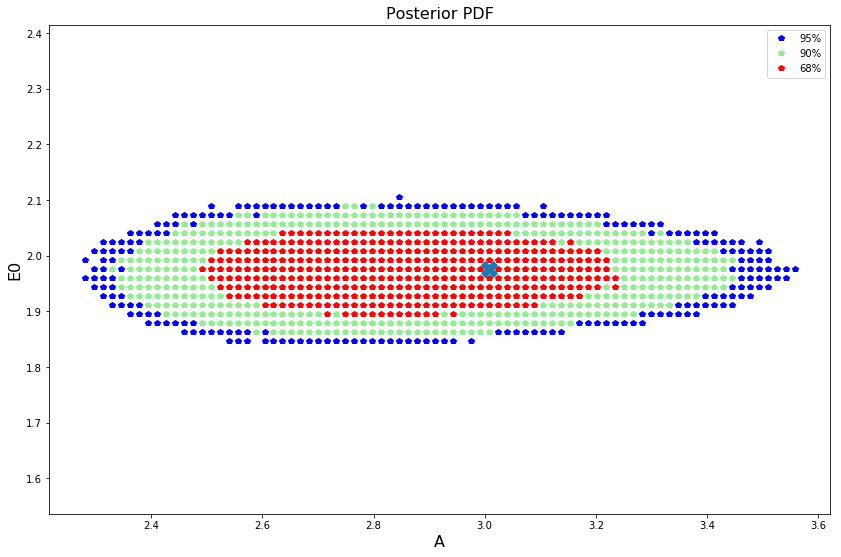

In [27]:
plt.figure(figsize=(14,9))
plt.plot(As[0],E0s[0],'p',color='blue',label='95%')
plt.plot(As[1],E0s[1],'p',c='lightgreen',label='90%')
plt.plot(As[2],E0s[2],'p',c='red',label='68%')
plt.title('Posterior PDF',fontsize=16)
plt.xlabel('A',fontsize=16)
plt.ylabel('E0',fontsize=16)
plt.plot(mode_parameter[0],mode_parameter[1],'X',markersize=16)
plt.axis('equal')
plt.legend()
plt.show()
#print As
#print E0s[2]

In [28]:
#From Bayes:
3.0040201005
1.97185929648
print mode_a
print mode_b

3.0040201005
1.97185929648


In [29]:
#from Teststatistic:
print mode_parameter

(3.0080808080808081, 1.9757575757575756)
